<a href="https://colab.research.google.com/github/Ritaprava95/Weapon_Segnebtaion/blob/main/WeaponSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade git+https://github.com/divamgupta/image-segmentation-keras

  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-ixnj7u68
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-ixnj7u68
     |████████████████████████████████| 3.3MB 31.5MB/s 
     |████████████████████████████████| 952kB 38.3MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp37-none-any.whl size=34545 sha256=a0d049ab2cb7beb78495b989f1c5b79b19e85d88b904405f370a40865f57896c
  Stored in directory: /tmp/pip-ephem-wheel-cache-izracf1w/wheels/a8/be/2c/1e1f0a75330e3ae33dd34c2ba085929eb7c7ae1d2184f4b7b5
Successfully built keras-segmentation
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.4.0 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully unin

In [ ]:
from keras_segmentation.pretrained import pspnet_50_ADE_20K , pspnet_101_cityscapes, pspnet_101_voc12

model = pspnet_50_ADE_20K() # load the pretrained model trained on ADE20k dataset

model = pspnet_101_cityscapes() # load the pretrained model trained on Cityscapes dataset

model = pspnet_101_voc12() # load the pretrained model trained on Pascal VOC 2012 dataset





264151040/264149344 [==============================] - 3s 0us/step


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/weapons_box_sem_seg

images	masks  test  val_images  val_masks


In [ ]:
out = model.predict_segmentation(
    inp="/content/drive/MyDrive/weapons_box_sem_seg/test/00000334.png",
    out_fname="out.png"
)

In [ ]:
import os
import cv2

In [ ]:
for e in os.listdir("/content/drive/MyDrive/weapons_box_sem_seg/images/"):
  if e not in os.listdir("/content/drive/MyDrive/weapons_box_sem_seg/masks/"):
    os.rename("/content/drive/MyDrive/weapons_box_sem_seg/images/"+e, "/content/drive/MyDrive/weapons_box_sem_seg/test/"+e)


In [ ]:
!ls /content/drive/MyDrive/weapons_box_sem_seg/test

00000150.png  00000334.png  00000555.png  00000958.png	00000964.png
00000227.png  00000384.png  00000804.png  00000959.png


In [ ]:
os.mkdir('/content/drive/MyDrive/weapons_box_sem_seg/annotations/')
os.mkdir('/content/drive/MyDrive/weapons_box_sem_seg/val_annotations/')

In [ ]:
!ls /content/drive/MyDrive/weapons_box_sem_seg

annotations  images  masks  test  val_annotations  val_images  val_masks


In [ ]:
#os.mkdir("/content/drive/MyDrive/weapons_box_sem_seg/val_images")
#os.mkdir("/content/drive/MyDrive/weapons_box_sem_seg/val_masks")
import random
for i in range(100):
  f = random.choice(os.listdir("/content/drive/MyDrive/weapons_box_sem_seg/images/"))
  os.rename("/content/drive/MyDrive/weapons_box_sem_seg/images/"+f, "/content/drive/MyDrive/weapons_box_sem_seg/val_images/"+f)
  os.rename("/content/drive/MyDrive/weapons_box_sem_seg/masks/"+f, "/content/drive/MyDrive/weapons_box_sem_seg/val_masks/"+f)

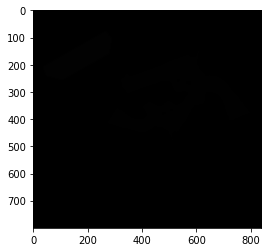

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("/content/drive/MyDrive/weapons_box_sem_seg/masks/00000003.png")
raw = image.copy()
image[np.where((image==[0,0,255]).all(axis=2))] = [1,1,1]
image[np.where((image==[0,255,0]).all(axis=2))] = [2,2,2]
plt.imshow( image)
plt.show()



In [ ]:
for f in os.listdir("/content/drive/MyDrive/weapons_box_sem_seg/images/"):
  #print(f)
  img = cv2.imread("/content/drive/MyDrive/weapons_box_sem_seg/masks/"+f)
  # print(len(img))
  img[np.where((img==[0,255,0]).all(axis=2))] = [1,1,1]
  img[np.where((img==[0,0,255]).all(axis=2))] = [2,2,2]
  cv2.imwrite( "/content/drive/MyDrive/weapons_box_sem_seg/annotations/"+f ,img )

In [ ]:
for f in os.listdir("/content/drive/MyDrive/weapons_box_sem_seg/val_images/"):
  #print(f)
  img = cv2.imread("/content/drive/MyDrive/weapons_box_sem_seg/val_masks/"+f)
  # print(len(img))
  img[np.where((img==[0,255,0]).all(axis=2))] = [1,1,1]
  img[np.where((img==[0,0,255]).all(axis=2))] = [2,2,2]
  cv2.imwrite( "/content/drive/MyDrive/weapons_box_sem_seg/val_annotations/"+f ,img )

In [ ]:
from keras_segmentation.models.unet import vgg_unet
model = vgg_unet(n_classes=2 ,  input_height=416, input_width=608  )

model.train(
    train_images =  "/content/drive/MyDrive/weapons_box_sem_seg/images/",
    train_annotations = "/content/drive/MyDrive/weapons_box_sem_seg/masks/",
    checkpoints_path = "/tmp/vgg_unet_1" , epochs=5
)

out = model.predict_segmentation(
    inp="/content/drive/MyDrive/weapons_box_sem_seg/test/00000334.png",
    out_fname="vgg_unet_out.png"
)

import matplotlib.pyplot as plt
plt.imshow(out)

# evaluating the model 
print(model.evaluate_segmentation( inp_images_dir="/content/drive/MyDrive/weapons_box_sem_seg/val_images/"  , annotations_dir="/content/drive/MyDrive/weapons_box_sem_seg/val_masks/" ) )


58892288/58889256 [==============================] - 0s 0us/step
Verifying training dataset


 40%|████      | 300/743 [04:16<06:17,  1.17it/s]

KeyboardInterrupt: ignored

In [ ]:
#transfer learning 
from keras_segmentation.models.model_utils import transfer_weights
from keras_segmentation.pretrained import pspnet_50_ADE_20K , pspnet_101_cityscapes, pspnet_101_voc12 
from keras_segmentation.models.pspnet import pspnet_50, pspnet_101

pretrained_model = pspnet_50_ADE_20K()

new_model = pspnet_50( n_classes=3)

transfer_weights( pretrained_model , new_model  ) # transfer weights from pre-trained model to your model

new_model.train(
    train_images =  "/content/drive/MyDrive/weapons_box_sem_seg/images/",
    train_annotations = "/content/drive/MyDrive/weapons_box_sem_seg/annotations/",
    checkpoints_path = "/content/drive/MyDrive/weapons_box_sem_se/new_model" , epochs=10
)

112it [00:00, 1118.65it/s]

Copying weights 


225it [00:00, 731.45it/s]


Copied weights of 120 layers and skipped 1 layers
Verifying training dataset


100%|██████████| 743/743 [10:12<00:00,  1.21it/s]


Dataset verified! 
Epoch 1/10
512/512 [==============================] - 324s 547ms/step - loss: 0.3398 - accuracy: 0.9084

Epoch 00001: saving model to /tmp/vgg_unet_1.00001
Epoch 2/10
512/512 [==============================] - 281s 549ms/step - loss: 0.0864 - accuracy: 0.9700

Epoch 00002: saving model to /tmp/vgg_unet_1.00002
Epoch 3/10
512/512 [==============================] - 281s 549ms/step - loss: 0.0458 - accuracy: 0.9831

Epoch 00003: saving model to /tmp/vgg_unet_1.00003
Epoch 4/10
512/512 [==============================] - 281s 548ms/step - loss: 0.0261 - accuracy: 0.9902

Epoch 00004: saving model to /tmp/vgg_unet_1.00004
Epoch 5/10
512/512 [==============================] - 280s 547ms/step - loss: 0.0301 - accuracy: 0.9891

Epoch 00005: saving model to /tmp/vgg_unet_1.00005
Epoch 6/10
512/512 [==============================] - 281s 548ms/step - loss: 0.0242 - accuracy: 0.9910

Epoch 00006: saving model to /tmp/vgg_unet_1.00006
Epoch 7/10
512/512 [=========================

In [ ]:
print(new_model.evaluate_segmentation( inp_images_dir="/content/drive/MyDrive/weapons_box_sem_seg/val_images/"  , annotations_dir="/content/drive/MyDrive/weapons_box_sem_seg/val_masks/" ) )



0it [00:00, ?it/s]
1it [00:01,  1.93s/it]
2it [00:02,  1.66s/it]
3it [00:03,  1.46s/it]
4it [00:05,  1.33s/it]
5it [00:06,  1.24s/it]
6it [00:07,  1.22s/it]
7it [00:08,  1.17s/it]
8it [00:09,  1.13s/it]
9it [00:10,  1.13s/it]
10it [00:11,  1.10s/it]
11it [00:12,  1.08s/it]
12it [00:13,  1.04s/it]
13it [00:14,  1.09s/it]
14it [00:15,  1.07s/it]
15it [00:16,  1.05s/it]
16it [00:17,  1.00s/it]
17it [00:18,  1.02it/s]
18it [00:19,  1.01s/it]
19it [00:20,  1.00it/s]
20it [00:21,  1.09s/it]
21it [00:22,  1.08s/it]
22it [00:24,  1.12s/it]
23it [00:24,  1.04s/it]
24it [00:26,  1.07s/it]
25it [00:27,  1.03s/it]
26it [00:27,  1.02it/s]
27it [00:28,  1.02it/s]
28it [00:30,  1.04s/it]
29it [00:31,  1.07s/it]
30it [00:32,  1.06s/it]
31it [00:33,  1.04s/it]
32it [00:34,  1.04s/it]
33it [00:35,  1.02s/it]
34it [00:36,  1.01it/s]
35it [00:37,  1.00it/s]
36it [00:38,  1.00s/it]
37it [00:39,  1.02s/it]
38it [00:40,  1.02s/it]
39it [00:41,  1.03s/it]
40it [00:42,  1.03s/it]
41it [00:43,  1.04s/it]
42it 

{'frequency_weighted_IU': 1.0, 'mean_IU': 0.5, 'class_wise_IU': array([1., 0.])}


In [ ]:
out = new_model.predict_segmentation(
    inp="/content/drive/MyDrive/weapons_box_sem_seg/test/00000227.png",
    out_fname="new_model_out.png"
)


In [ ]:
os.mkdir("/content/drive/MyDrive/weapons_box_sem_seg/test_mask/")

In [ ]:
for f in os.listdir("/content/drive/MyDrive/weapons_box_sem_seg/test/"):
  out = new_model.predict_segmentation(
    inp="/content/drive/MyDrive/weapons_box_sem_seg/test/"+f,
    out_fname="/content/drive/MyDrive/weapons_box_sem_seg/test_mask/"+f
  )
  res = cv2.imread("/content/drive/MyDrive/weapons_box_sem_seg/test_mask/"+f)
  res[np.where((res==[197, 215,  20]).all(axis=2))] = [0,0,0]
  res[np.where((res==[155, 244, 183]).all(axis=2))] = [0,255,0]
  res[np.where((res==[132, 248, 207]).all(axis=2))] = [0,0,255]
  cv2.imwrite("/content/drive/MyDrive/weapons_box_sem_seg/test_mask/"+f, res)


In [ ]:
img = cv2.imread("/content/drive/MyDrive/weapons_box_sem_seg/test_mask/00000227.png")
print(img[np.where((img!=[0, 0, 0]).all(axis=2))])

[[132 248 207]
 [132 248 207]
 [132 248 207]
 ...
 [132 248 207]
 [132 248 207]
 [132 248 207]]
